In [1]:
import pandas as pd

from IPython.display import Image
from pprint import pprint

# Load Data

In [2]:
# load data
df = pd.read_csv("../data/Iris.csv")

# one-hot encoding
species_one_hot = pd.get_dummies(df.species)
df = df.join(species_one_hot)
df = df.drop(["Id", "species"], axis=1)

df.loc[[1, 51, 101]]

,sepal_length,sepal_width,petal_length,petal_width,Iris-setosa,Iris-versicolor,Iris-virginica
1,4.9,3.0,1.4,0.2,1,0,0
51,6.4,3.2,4.5,1.5,0,1,0
101,5.8,2.7,5.1,1.9,0,0,1


# Output of one Neuron

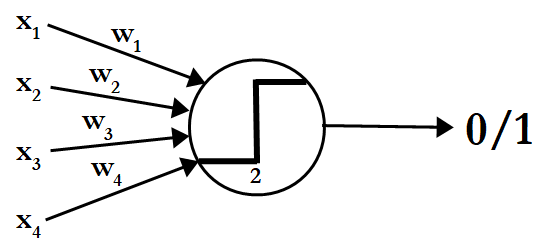

In [3]:
Image("../images/artificial_neuron.png", width=400)

In [4]:
inputs =  [4.9, 3.0,  1.4,  0.2]
weights = [0.9, 0.8, -1.0, -1.0]

In [5]:
def weighted_sum(inputs, weights):
    total = 0
    for input_value, weight in zip(inputs, weights):
        total += input_value * weight
        
    return total

In [6]:
def step_function(number):
    if number >= 2:
        return 1
    else:
        return 0

In [7]:
node_input = weighted_sum(inputs, weights)
print(node_input)

node_output = step_function(node_input)
node_output

5.21


1

# Output of the Neural Network

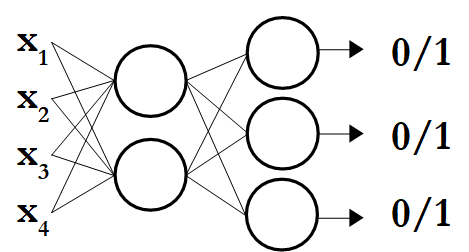

In [8]:
Image("../images/neural_net.png", width=400)

In [9]:
inputs = [[4.9, 3.0, 1.4, 0.2],
          [6.4, 3.2, 4.5, 1.5],
          [5.8, 2.7, 5.1, 1.9]]

weights_1 = [[ 0.9,  0.8, -1.0, -1.0],
             [-0.5, -0.5,  1.5,  1.0]]

weights_2 = [[ 2.0, -1.0],
             [ 1.0,  1.0],
             [-1.0,  2.0]]

In [10]:
def determine_layer_outputs(list_of_inputs, list_of_weights, activation_function=True):
    layer_outputs = []
    for inputs in list_of_inputs:
        
        node_outputs = []
        for weights in list_of_weights:
            node_input = weighted_sum(inputs, weights)
            if activation_function:
                node_output = step_function(node_input)
            else:
                node_output = node_input
            node_outputs.append(node_output)
            
        layer_outputs.append(node_outputs)
    
    return layer_outputs

In [11]:
hidden_layer_inputs = determine_layer_outputs(inputs, weights_1, activation_function=False)
pprint(hidden_layer_inputs)

print()

hidden_layer_outputs = determine_layer_outputs(inputs, weights_1)
pprint(hidden_layer_outputs, width=10)

[[5.21, -1.6500000000000006],
 [2.3200000000000003, 3.4499999999999993],
 [0.38000000000000034, 5.299999999999999]]

[[1, 0],
 [1, 1],
 [0, 1]]


In [12]:
output_layer_inputs = determine_layer_outputs(hidden_layer_outputs, weights_2, activation_function=False)
pprint(output_layer_inputs, width=20)

print()

output_layer_outputs = determine_layer_outputs(hidden_layer_outputs, weights_2)
pprint(output_layer_outputs, width=20)

[[2.0, 1.0, -1.0],
 [1.0, 2.0, 1.0],
 [-1.0, 1.0, 2.0]]

[[1, 0, 0],
 [0, 1, 0],
 [0, 0, 1]]


In [13]:
df.loc[[1, 51, 101]]

,sepal_length,sepal_width,petal_length,petal_width,Iris-setosa,Iris-versicolor,Iris-virginica
1,4.9,3.0,1.4,0.2,1,0,0
51,6.4,3.2,4.5,1.5,0,1,0
101,5.8,2.7,5.1,1.9,0,0,1
